# Capstone IV Data Visualisation

## Task

You will be tasked with
analysing a dataset of your choice. Furthermore, you will create a report that
contains several data visualisations that will clearly communicate your findings.
Finally, you will present your report for assessment.
Your report should include the following:
● A brief description of the dataset you have chosen
● A description of how your dataset was cleaned
● A description of how you managed missing data
● A detailed description of your findings accompanied by appropriate
visualisations
● A wide selection of appropriate data visualisations. Besides Matplotlib, we
encourage you to explore and use libraries with more interesting
visualisations
A template for the report (EDA_doc.odt) accompanies this task.
Ensure that your report is professional! Remember, such a report can be added in
your professional portfolio.

## Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

athletes_df = pd.read_csv('Forbes Richest Athletes 1990-2020.csv', encoding='utf-8')
athletes_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


## Missing data

In [2]:
# identify where the missing data is
athletes_df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [3]:
# view missing Previous Year Rank data
null_df = athletes_df[(athletes_df['Previous Year Rank'].isnull())]
null_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


## Data cleansing

Previous Year Rank is missing not at random, 10 will be unknown from the year prior to 1990 (the first year of the dataset) or missing at random if just missing. 1998 previous year rank is missing, ome values can be obtained from prior year data if needed eg Michael Jordan was rank 1 in the year previous to 1998.

I will drop Previous year rank from the dataset as it is not needed for my analysis.

In [4]:
# drop previous year rank from the dataset
athletes_df.drop(['Previous Year Rank'], axis=1, inplace=True)
athletes_df.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0


In [5]:
athletes_df.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

The naming of Sport is inconsistent between years.

I will replace NFL with American Football, NBA with Basketball, American Football/ Baseball with American Football, Auto Racing (Nascar) with Nascar, F1 Racing with F1 Motorsports, Hockey with Ice Hockey, auto racing with F1 Motorsports, 

In [6]:
# replace Sport values so they are consistent across years
athletes_df.replace('NFL','American Football', inplace=True)
athletes_df.replace('American Football / Baseball','American Football', inplace=True)
athletes_df.replace('NBA','Basketball', inplace=True)
athletes_df.replace('Auto Racing (Nascar)','Nascar', inplace=True)
athletes_df.replace('F1 racing','F1 Motorsports', inplace=True)
athletes_df.replace('Hockey','Ice Hockey', inplace=True)
athletes_df.replace('auto racing','F1 Motorsports', inplace=True)
athletes_df.replace('Auto Racing','F1 Motorsports', inplace=True)
athletes_df.replace('Auto racing','F1 Motorsports', inplace=True)

In [7]:
athletes_df.Sport.unique()

array(['boxing', 'F1 Motorsports', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Golf', 'Tennis', 'American Football', 'Baseball',
       'Ice Hockey', 'tennis', 'ice hockey', 'NASCAR', 'Nascar', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

## Data exploration

In [9]:
# summarise numerical values
athletes_df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [10]:
# sum total earnings
athletes_df['earnings ($ million)'].sum()

13700.4

## Description of data

Forbes Magazine list of the 10 highest earning athletes in the world each year for the period of 1990 - 2020.

The dataset contains 301 athlete entries showing Name, Nationality and Sport.

Annual earnings range from a low of 8.1 million to a high of 300 million dollars. 

The total earnings of all entries from 1990 to 2020 was 13.7 billion dollars. Average earnings per year was 45.5 million.

In 2002 they changed the reporting period from the full calendar year to June-to-June hence there are no records for 2001.








## Visualisations

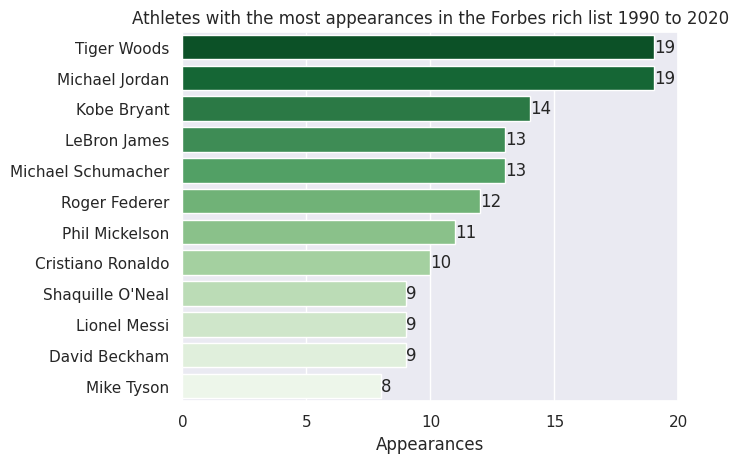

In [12]:
# number of appearances by athlete name
ax = sns.countplot(
data=athletes_df,
y=athletes_df.Name, 
order=athletes_df.Name.value_counts().iloc[0:12].index, # Order by largest count
palette='Greens_r'
)
ax.bar_label(ax.containers[0])
sns.set_theme()
plt.title("Athletes with the most appearances in the Forbes rich list 1990 to 2020")
plt.xlabel('Appearances')
plt.ylabel('')
plt.xticks([0, 5, 10, 15, 20])
plt.show()

Tiger Woods and Michael Jordan are the athletes with the most appearances on the Forbes list, they have each appeared in the Top 10 for 19 of the 30 years.

This confirms that these two athletes have had elite level careers for a sustained period of time.

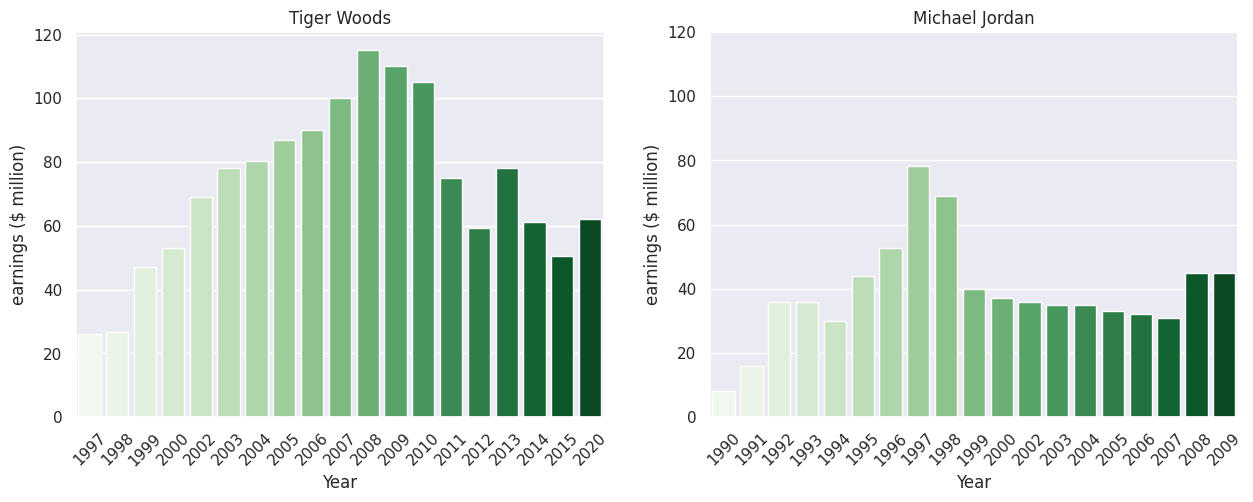

In [13]:
# View earnings by year for the athletes with the most appearances
fig, [ax1, ax2,] = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data=athletes_df[athletes_df.Name=='Tiger Woods'], x='Year', y='earnings ($ million)', ax=ax1, palette='Greens',)
sns.barplot(data=athletes_df[athletes_df.Name=='Michael Jordan'], x='Year', y='earnings ($ million)',ax=ax2, palette='Greens',)

ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=45)
ax1.set_title('Tiger Woods')
ax2.set_title('Michael Jordan')
plt.yticks([0, 20, 40, 60, 80, 100, 120])
plt.show()

Both athletes have 19 appearances in the top 10. Michael Jordan appeared in 19 consecutive years between 1990 and 2009. Tiger Woods first appeared on the list in 1997 and then managed 18 consecutive appearances until 2015, after a break of 4 years he reappeared on the list in 2020.


Tiger Woods' earning levels are significantly higher than Michael Jordan as shown in the charts above, this might be due to Micheal Jordan career starting earlier but there is an overlapping period of 12 years where Tiger Woods was earning more than Michael Jordan.

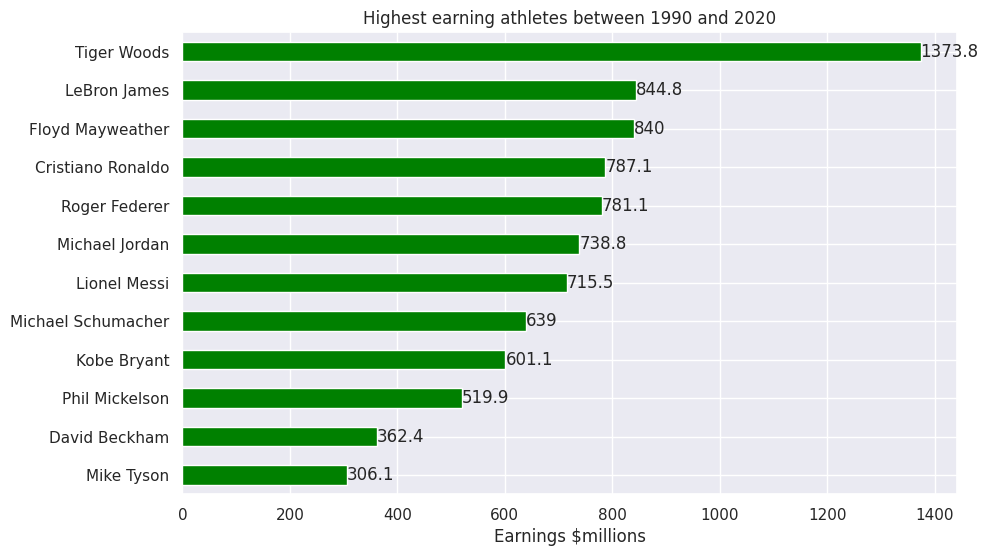

In [16]:
# Highest earning athletes
group_by_name = athletes_df.groupby(['Name'])
sum_by_name = group_by_name.sum('earnings ($ million)')
sum_by_name = pd.DataFrame(sum_by_name.iloc[:,3])
sum_by_name = sum_by_name.sort_values('earnings ($ million)', ascending=True)
sum_by_name.head()

ax=sum_by_name.tail(12).plot(kind='barh', figsize=(10,6), color='Green', legend=False, title='Highest earning athletes between 1990 and 2020')
ax.bar_label(ax.containers[0])
plt.xlabel('Earnings $millions')
plt.ylabel('')
plt.show()

From the graph above we can see that as well as having the most appearances in the Forbes Top 10 list, Tiger Woods also is the highest earning athlete in total between 1990 and 2020 at over 1.3 billion dollars someway clear of the second placed athlete LeBron James with 0.8 billion.

Despite Michael Jordan also having 19 appearances in the Top 10 he ranks 6th in total earnings with 0,7 billion dollars. LeBron James, Floyd Mayweather, Cristiano Ronaldo and Roger Federer have higher total earnings from a shorter period of time.

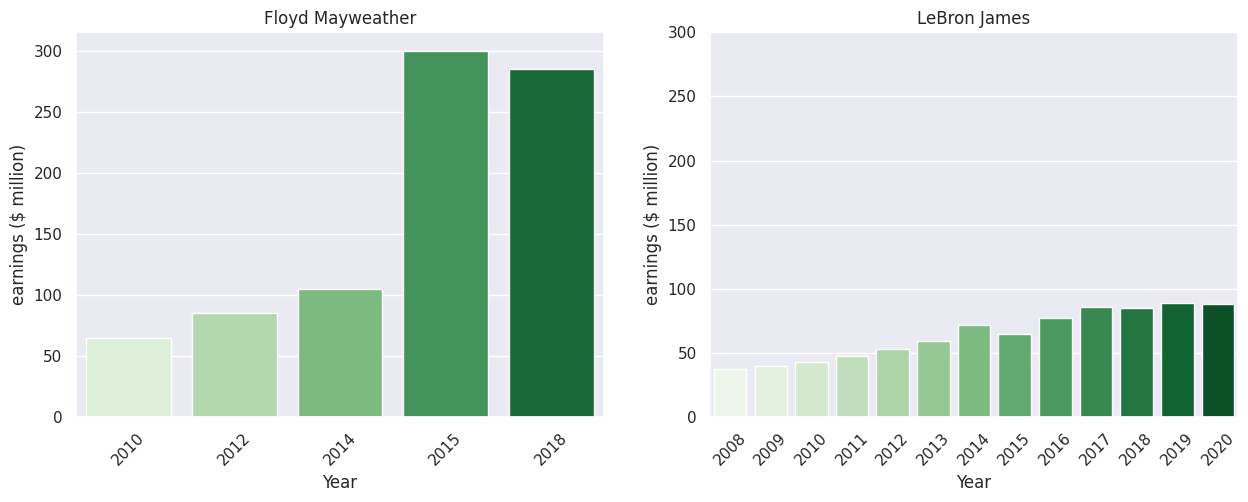

In [17]:
# View earnings by year for the next 2 athletes with the most earnings
fig, [ax1, ax2,] = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data=athletes_df[athletes_df.Name=='Floyd Mayweather'], x='Year', y='earnings ($ million)', ax=ax1, palette='Greens',)
sns.barplot(data=athletes_df[athletes_df.Name=='LeBron James'], x='Year', y='earnings ($ million)',ax=ax2, palette='Greens',)
ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=45)
ax1.set_title('Floyd Mayweather')
ax2.set_title('LeBron James')
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.show()


2nd in the list of total earnings of 844 million dollars is LeBron James with 13 appearances from 2008 to 2020.

3rd in the list of total earnings of 840 million dollars is Floyd Mayweather and he has amassed his earnings from 5 appearances on the Top 10 list. Mayweather's earnings have taken a significant boost in 2015 and 2018 with annual earnings of 300 million and 285 million dollars respectively. 

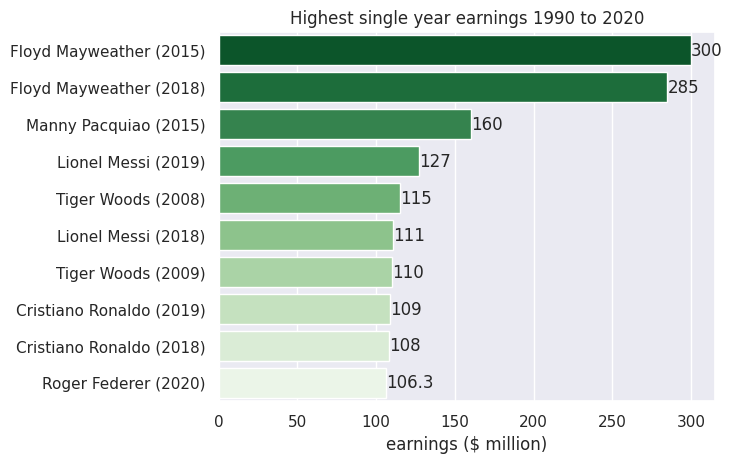

In [80]:

annual = pd.DataFrame(athletes_df.sort_values('earnings ($ million)', ascending=False).iloc[0:10])
annual['Name/Year']= annual['Name'].astype(str) +' (' + annual['Year'].astype(str)+')'
annual

ax=sns.barplot(data=annual, y='Name/Year', x='earnings ($ million)', palette='Greens_r',)
ax.bar_label(ax.containers[0])
plt.title("Highest earnings in a single year 1990 to 2020")
plt.ylabel('')
plt.show()

The graph above shows the highest earnings in a single year during the period 1990 to 2020 which shows Mayweather earnings in 2015 and 2018 being some way higher than any other athletes annual earnings.

These high earning years were down to 2 out-of-the ordinary boxing bouts that smashed pay per view tv records vs Manny Pacquiao (2015) and Conor McGregor (2018). Manny Pacquiao is third in the list with 160 million dollars for his part in the bout with Mayweather.

These top 3 entries are so much higher than any other earnings that they could be considered outliers that could skew the overall data.


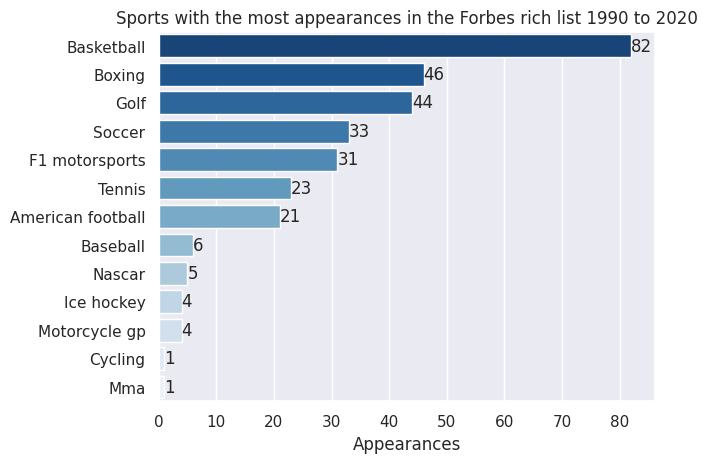

In [16]:
# number of appearances by Sport
ax = sns.countplot(
data=athletes_df,
y=athletes_df['Sport'].str.capitalize(), 
order=athletes_df['Sport'].str.capitalize().value_counts().iloc[:].index, # Order by largest count
palette='Blues_r'
)
ax.bar_label(ax.containers[0])
plt.title("Sports with the most appearances in the Forbes rich list 1990 to 2020")
plt.xlabel('Appearances')
plt.ylabel('')
plt.show()

Analysing the numbers of entries each sport has had on the Top 10 list Basketball has had by far the most entries with 82 out of the 301 records, suggesting that this is the most lucrative sport in the world.

Boxing and Golf come next with 46 and 44 respectively.

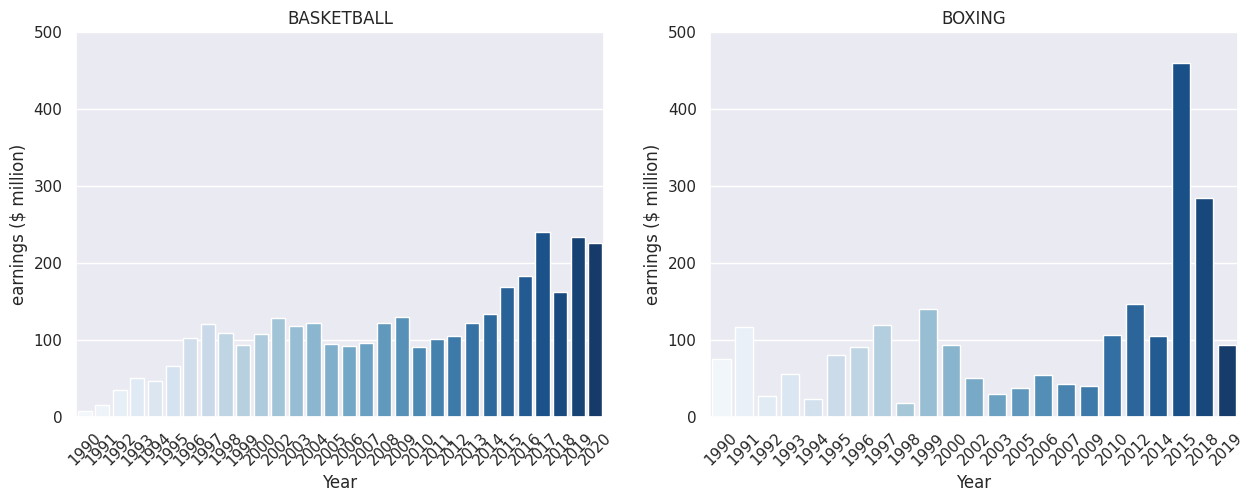

In [17]:
#View earnings by year for basketball and boxing
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data=athletes_df[athletes_df['Sport'].str.capitalize()=='Basketball'], x='Year', y='earnings ($ million)', estimator=sum, errorbar=None, ax=ax1, palette='Blues',)
sns.barplot(data=athletes_df[athletes_df['Sport'].str.capitalize()=='Boxing'], x='Year', y='earnings ($ million)',estimator=sum, errorbar=None, ax=ax2, palette='Blues')
#ax.bar_label(ax.containers[0])
ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=45)
ax1.set_title('BASKETBALL')
ax2.set_title('BOXING')
ax1.set_yticks([0,100,200,300,400,500])
ax2.set_yticks([0,100,200,300,400,500])
plt.show()

Earnings by year for Basketball appears to be fairly consisent since 1995 at around 100 million with an increase to 200 million over the last 10 years.

Boxing earnings have seen a lot more fluctuations over the years with the 'Mayweather' years of 2015 and 2018 providing a signifcant boost.

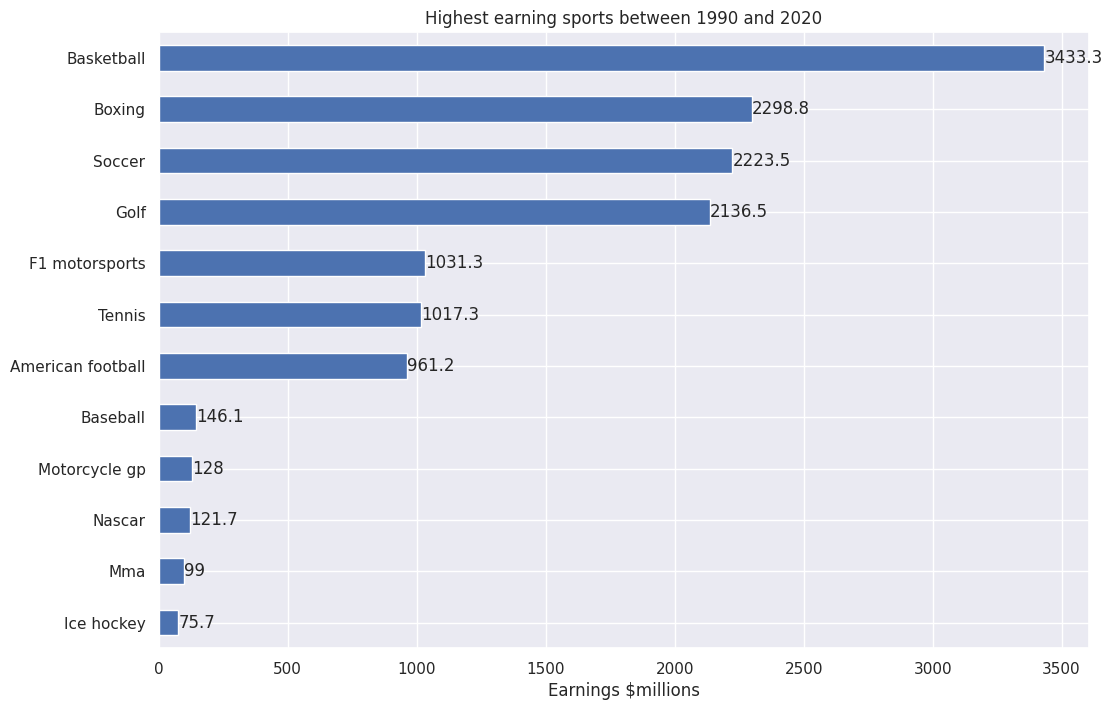

In [18]:
# Highest earning sports
group_by_sport = athletes_df.groupby(athletes_df['Sport'].str.capitalize())
sum_by_sport = group_by_sport.sum('earnings ($ million)')
sum_by_sport = pd.DataFrame(sum_by_sport.iloc[:,3])
sum_by_sport = sum_by_sport.sort_values('earnings ($ million)', ascending=True)
sum_by_sport.head()

ax=sum_by_sport.tail(12).plot(kind='barh', figsize=(12,8), legend=False, title='Total earnings by sport between 1990 and 2020')
ax.bar_label(ax.containers[0])
plt.xlabel('Earnings $millions')
plt.ylabel('')
plt.show()

As well as having the most entries on the list Basketball also has the highest total earning between 1990 and 2020 with 3.4 billion dollars confirming how lucrative and popular this Sport is on the global stage.

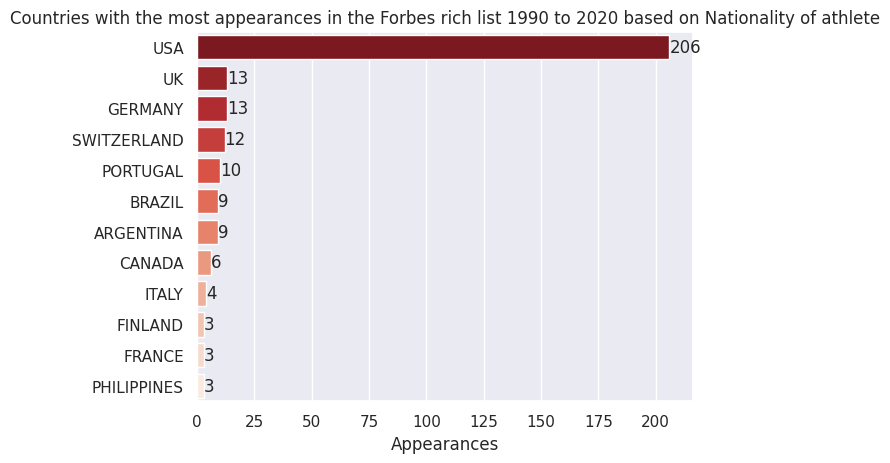

In [19]:
# number of appearances by Nationality
ax = sns.countplot(
data=athletes_df,
y=athletes_df['Nationality'].str.upper(), 
order=athletes_df['Nationality'].str.upper().value_counts().iloc[0:12].index, # Order by largest count
palette='Reds_r'
)
ax.bar_label(ax.containers[0])
plt.title("Countries with the most appearances in the Forbes rich list 1990 to 2020 based on Nationality of athlete")
plt.xlabel('Appearances')
plt.ylabel('')
plt.show()

The list of highest earning athletes is dominated by those from USA. Of the 301 entries between 1990 and 2020 206 have USA listed as their Nationality (68%).

The next Nationalities with the most entries are Germany and UK with 13 each.



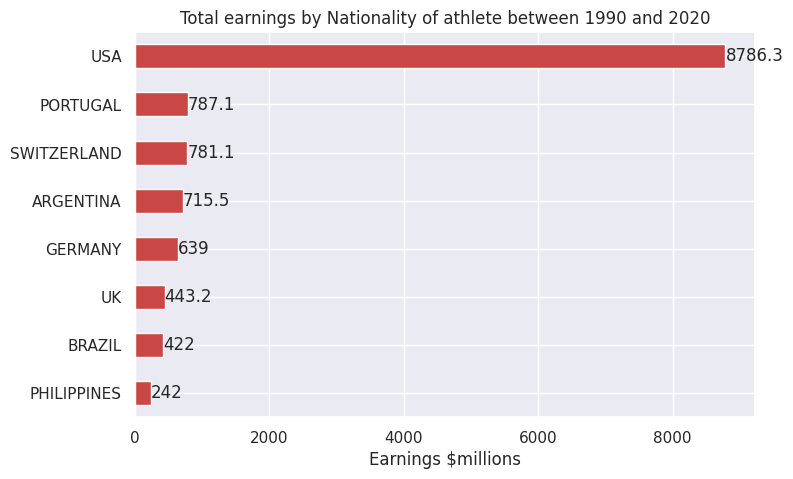

In [20]:
# Highest earning countries
group_by_country = athletes_df.groupby(athletes_df['Nationality'].str.upper())
sum_by_country = group_by_country.sum('earnings ($ million)')
sum_by_country = pd.DataFrame(sum_by_country.iloc[:,3])
sum_by_country = sum_by_country.sort_values('earnings ($ million)', ascending=True)
#sum_by_country.head()

ax=sum_by_country.tail(8).plot(kind='barh', figsize=(8,5), color='#C94845', legend=False, title='Total earnings by Nationality of athlete between 1990 and 2020')
ax.bar_label(ax.containers[0])
plt.xlabel('Earnings $millions')
plt.ylabel('')
plt.show()

The same can be seen from the total earning graph for 1990 to 2020 with USA accounting for 8.7 billion of the 13.7 billion total (63%)

USA is clearly the highest paying country for Sports.

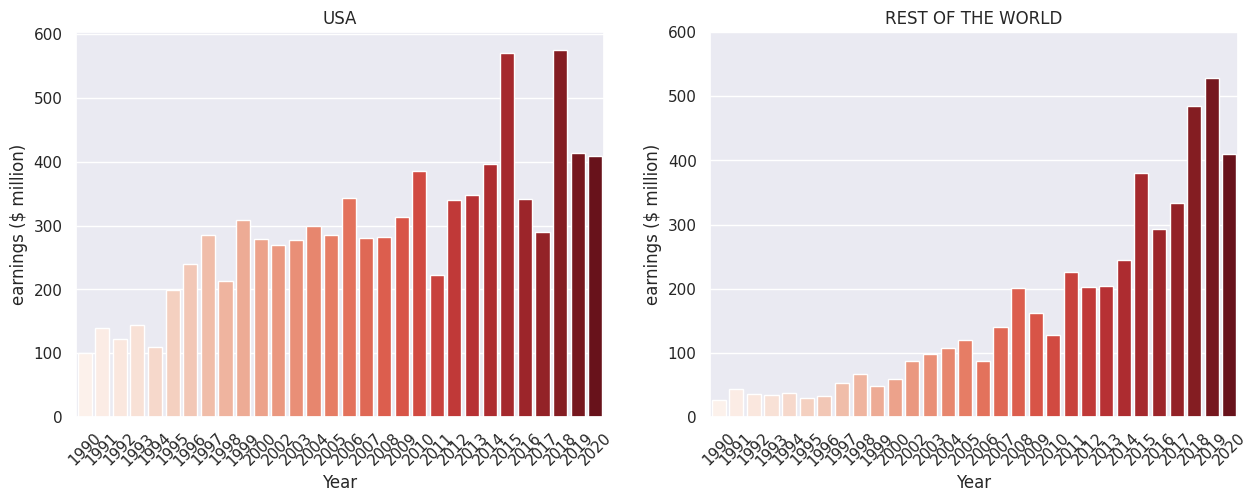

In [21]:
#View earnings by year for USA vs rest of the world
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data=athletes_df[athletes_df['Nationality'].str.upper()=='USA'], x='Year', y='earnings ($ million)', estimator=sum, errorbar=None, ax=ax1, palette='Reds',)
sns.barplot(data=athletes_df[athletes_df['Nationality'].str.upper()!='USA'], x='Year', y='earnings ($ million)',estimator=sum, errorbar=None, ax=ax2, palette='Reds')
#ax.bar_label(ax.containers[0])
ax1.set_xticklabels(ax1.get_xmajorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=45)
ax1.set_title('USA')
ax2.set_title('REST OF THE WORLD')
ax2.set_yticks([0,100,200,300,400,500,600])
plt.show()

Comparing the earnings of the USA athletes to the rest of the world over the 30 year period confirms that the USA has sustained paying high earnings for a much longer period.

The plot for the rest of the year appears to be trending upwards quite significantly suggesting that it may be catching up over the last 5 years. It will be interesting to see what happens over the next 10 years.

Text(0, 0.5, 'Earnings ($m)')

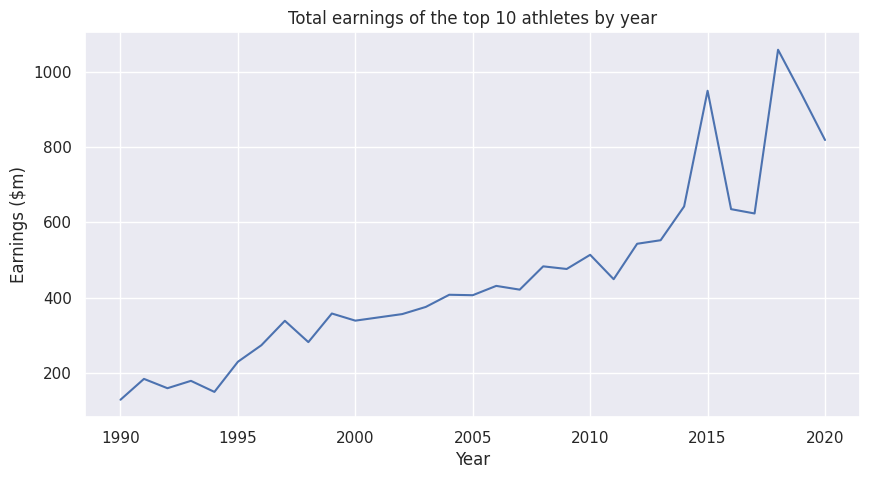

In [22]:
# view the trands of the overall earnings by year
group_by_year = athletes_df.groupby(['Year'])

group_by_year['earnings ($ million)'].sum().plot(kind='line', figsize=(10,5), title='Total earnings of the top 10 athletes by year')
plt.ylabel('Earnings ($m)')

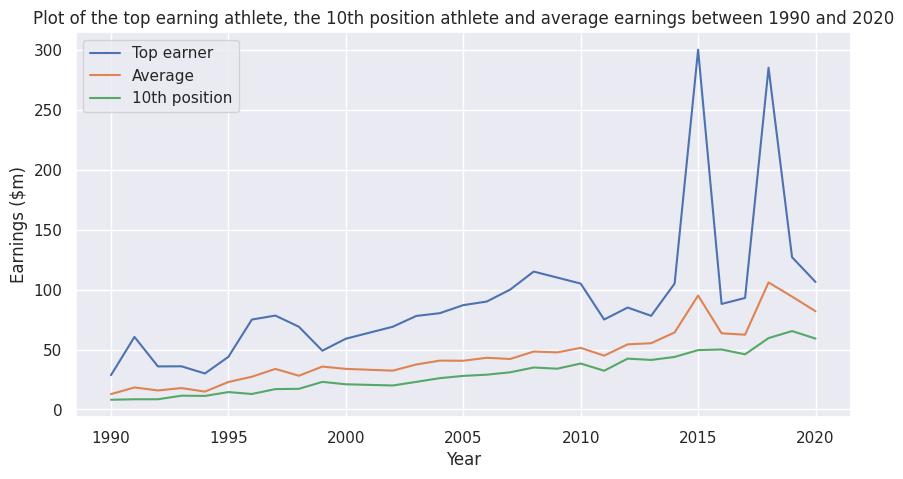

In [23]:
group_by_year['earnings ($ million)'].max().plot(kind='line', figsize=(10,5), label='Top earner')
group_by_year['earnings ($ million)'].mean().plot(kind='line', figsize=(10,5), label='Average')
group_by_year['earnings ($ million)'].min().plot(kind='line', figsize=(10,5), label='10th position')
plt.title('Plot of the top earning athlete, the 10th position athlete and average earnings between 1990 and 2020')
plt.ylabel('Earnings ($m)')
plt.legend()

In [24]:
group_by_year['earnings ($ million)'].mean()

Year
1990     12.800000
1991     18.350000
1992     15.870000
1993     17.830000
1994     14.890000
1995     22.910000
1996     27.310000
1997     33.810000
1998     28.140000
1999     35.750000
2000     33.850000
2002     32.363636
2003     37.500000
2004     40.740000
2005     40.620000
2006     43.100000
2007     42.100000
2008     48.300000
2009     47.600000
2010     51.370000
2011     44.880000
2012     54.310000
2013     55.250000
2014     64.240000
2015     95.030000
2016     63.520000
2017     62.370000
2018    105.940000
2019     94.140000
2020     81.920000
Name: earnings ($ million), dtype: float64

The general trend shows an increase in earnings over the 30 years.

Average earnings in 1990 were 12.8 million, in 2020 the average was 81.9 million which is more than a 6 times increase.

2015 and 2018 earnings were particularly high which saw a spike that could be treated as outliers and explained by the unprecedented large earnings of the highest paid athlete Floyd Mayweather.



/tmp/ipykernel_2013/83892544.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=45)


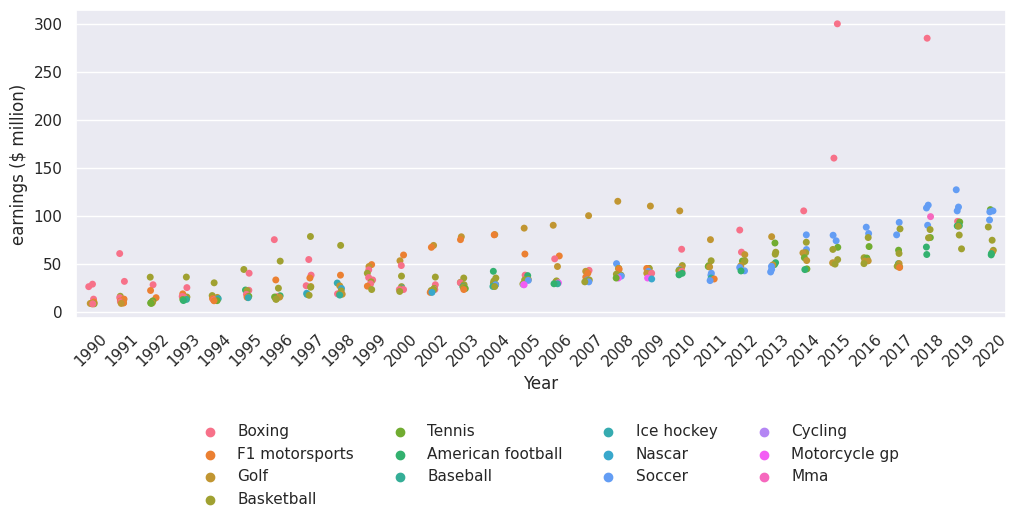

In [25]:
fig, ax = plt.subplots(1, figsize=(12,4))
sns.stripplot(y='earnings ($ million)', x='Year', data=athletes_df, hue=athletes_df['Sport'].str.capitalize(), jitter=0.1)
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=45)
sns.move_legend(ax, "best", bbox_to_anchor=(.9, -.3), ncol=4, title=None, frameon=False)
plt.show()

The scatter plot above gives an idea of how the different sports have performed over the 30 year period.

Naroowing down the period into decades, 

The 1990s doesnt have many huge earnings but the sports that figure the most are Basketball, Boxing and F1 - the Micahel Jordan era.

The 2000's sees earnings trending upwards with the highest earners in Golf and F1 - the Tiger Woods era

The 2010's sees earnings increasing again with a lot more entries coming from Soccer but the points for Boxing are clearly pointing to outliers as they are so much higher than anything seen before - the Floyd Mayweather era.

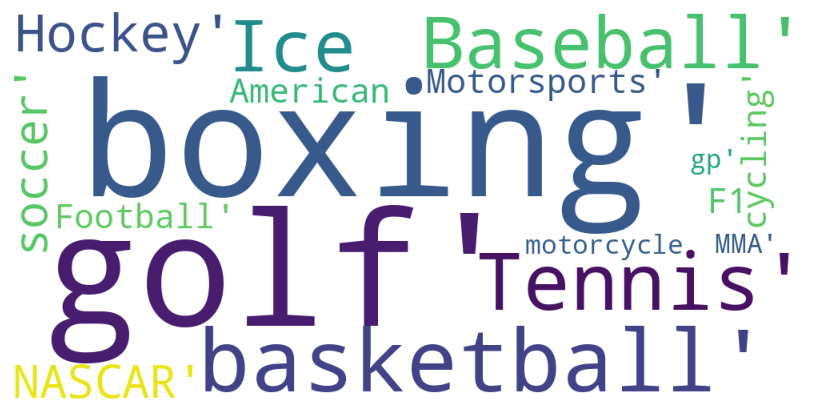

In [26]:
words = athletes_df['Sport'].unique()

wordcloud = WordCloud(width = 1000, height = 500, 
background_color ='white').generate(str(words))
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

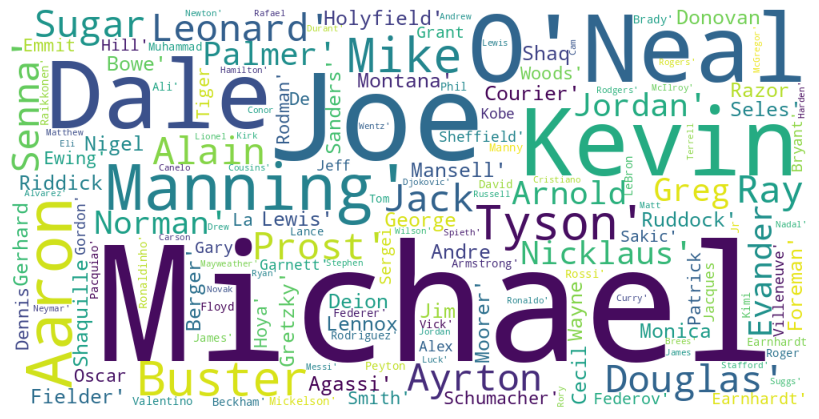

In [27]:
words = athletes_df['Name'].unique()

wordcloud = WordCloud(width = 1000, height = 500, 
background_color ='white').generate(str(words))
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
